In [1]:
! [ -e /content ] && pip install -Uqq fastbook

import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 96.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 79.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.0 MB/s eta 0:00:00
Mounted at /content/gdrive


In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [3]:
search_images_ddg

<function fastbook.search_images_ddg(term, max_images=200)>

In [4]:
ims = search_images_ddg("grizzly bear")
len(ims)

200

In [5]:
dest = "images/grizzly.jpg"
download_url(ims[0], dest, show_progress=False)

Path('images/grizzly.jpg')

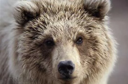

In [6]:
im = Image.open(dest)
im.to_thumb(128, 128)

In [7]:
bear_types = "grizzly", "black", "teddy"
path = Path("bears")

In [8]:
if not path.exists():
  path.mkdir()
  for o in bear_types:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_images_ddg(f"{o} bear")
    download_images(dest, urls=results)

In [9]:
fns = get_image_files(path)
fns

(#581) [Path('bears/teddy/101c7738-e360-4cd8-b642-419ebfd62a0b.jpg'),Path('bears/teddy/91e68320-22e1-49fd-b5e0-c612cf84bf37.jpeg'),Path('bears/teddy/a88b934b-bf0e-4e89-b0f7-3d929877d4df.jpg'),Path('bears/teddy/c7faafe9-88a0-41a8-b994-4a68aea6924f.jpg'),Path('bears/teddy/7f4c2ffb-d69d-4744-83b3-fcde13d903cb.jpg'),Path('bears/teddy/69f142cc-5c18-40f8-85de-3cfedf51e699.jpg'),Path('bears/teddy/e9ff9ac3-3804-4857-8ca4-acfdf4b02223.jpg'),Path('bears/teddy/bdf29173-9a2b-4d3a-858d-9992d36c0eed.jpg'),Path('bears/teddy/8ba84ee7-07d2-4e47-8abd-6e8c491fc1cb.jpg'),Path('bears/teddy/1a555b1c-3785-4fc3-8a62-81933c193995.jpg')...]

In [10]:
failed = verify_images(fns)
failed

(#29) [Path('bears/teddy/c7faafe9-88a0-41a8-b994-4a68aea6924f.jpg'),Path('bears/teddy/e9ff9ac3-3804-4857-8ca4-acfdf4b02223.jpg'),Path('bears/teddy/22a0e41b-61f6-4d8c-a369-846f892b6c6a.png'),Path('bears/teddy/8439efd4-a779-4a27-a97d-b1c4737616c0.JPG'),Path('bears/teddy/23a9d99d-77b6-410d-8c6c-13706dcd9011.jpg'),Path('bears/teddy/bbd27e7d-4666-4299-bfe0-c26478e0434b.jpg'),Path('bears/teddy/38e3544c-41ef-4275-b9a5-0ba9c98989f2.jpg'),Path('bears/teddy/02b2db4f-6fd3-48fc-bd6e-24707bd71a36.jpg'),Path('bears/teddy/9d0331c9-9529-48c8-a656-fd63458b2d7b.jpg'),Path('bears/teddy/50114e87-4349-447d-ba1e-cbc444f4e968.jpg')...]

In [11]:
failed.map(Path.unlink);

In [12]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [13]:
dls = bears.dataloaders(path)

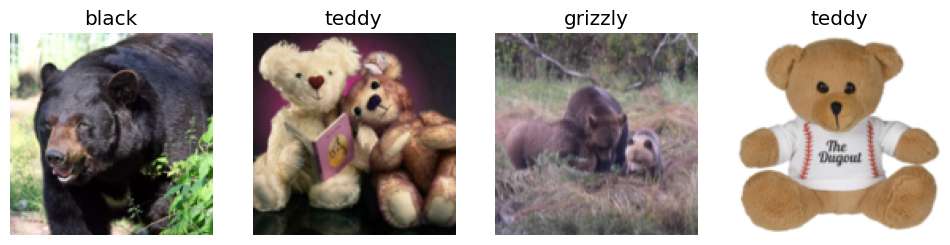

In [14]:
dls.valid.show_batch(max_n=4, nrows=1)

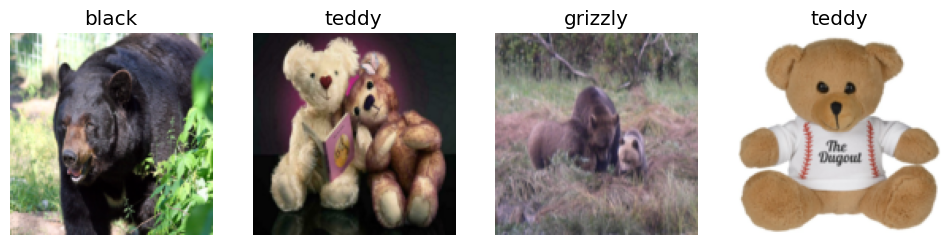

In [15]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

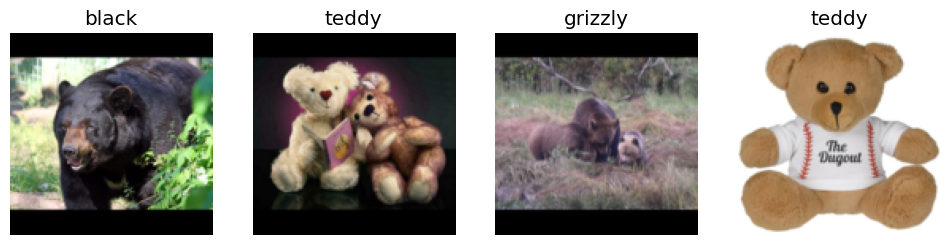

In [16]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode="zeros"))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

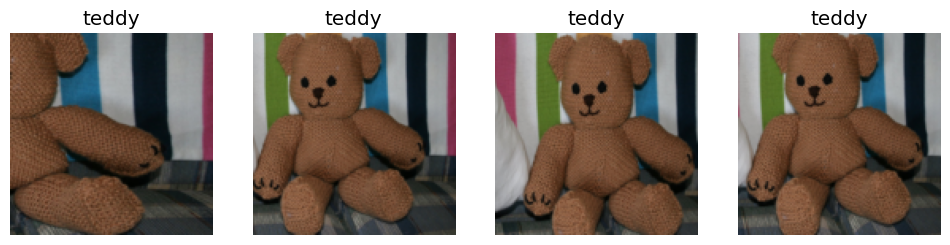

In [17]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

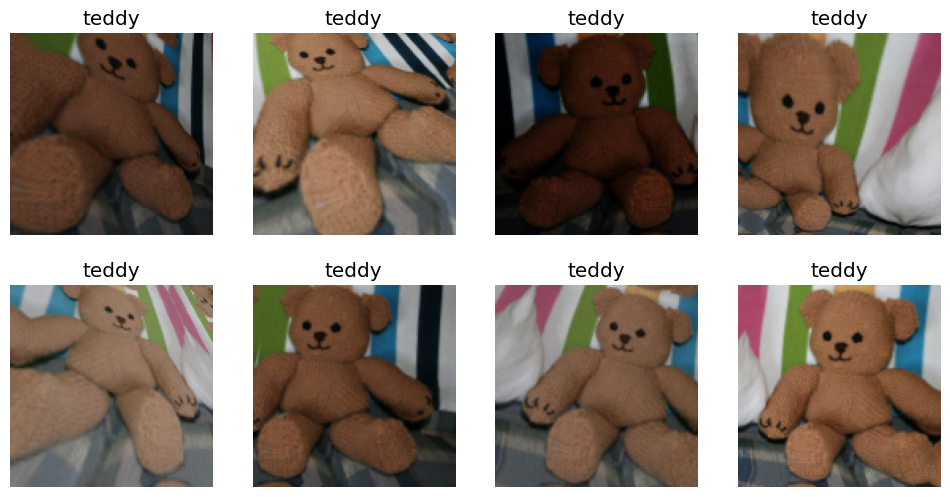

In [18]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [19]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)

dls = bears.dataloaders(path)

In [20]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 208MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.251934,0.216262,0.063636,00:29


epoch,train_loss,valid_loss,error_rate,time
0,0.212724,0.210882,0.054545,00:30
1,0.189941,0.244521,0.045455,00:29
2,0.179891,0.283514,0.054545,00:31
3,0.149758,0.277195,0.054545,00:27


In [22]:
learn.export("model.pkl")